In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
# import packages

In [4]:
df_b = pd.read_json(r"yelp_academic_dataset_business.json", lines=True)
df_b.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


Text(0, 0.5, 'Frequency')

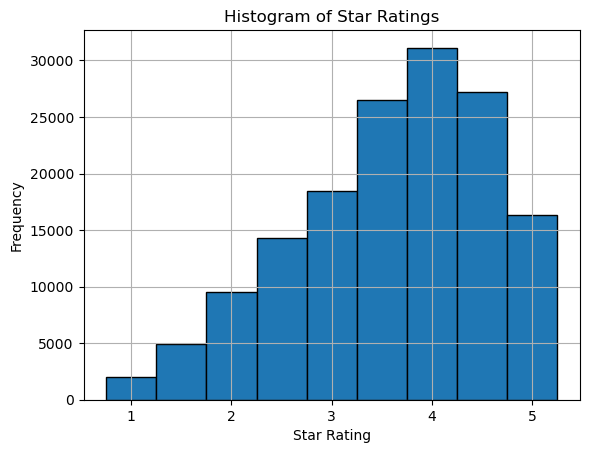

In [11]:
df_b_c = df_b.dropna(subset=['stars'])
stars = df_b_c.pivot_table(values="stars", index="business_id") 
bin_edges = [0.75 + 0.5 * i for i in range(10)]  
df_b_c['stars'].hist(bins=bin_edges,edgecolor='black')
plt.title('Histogram of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
#show the histogram of star ratings. Find that most of the rating is located around 4.

In [4]:
state_avg_stars = df_b_c.groupby('state')['stars'].mean()
sorted_states = state_avg_stars.sort_values(ascending=False)
print(sorted_states)
# Sort the states by the average stars.

state
MT     5.000000
VT     4.500000
UT     4.500000
SD     4.500000
HI     4.250000
XMS    4.000000
CO     4.000000
CA     3.996733
NV     3.736876
ID     3.707634
LA     3.679162
FL     3.610957
AZ     3.592010
IN     3.588246
PA     3.573019
TN     3.571500
MO     3.546092
WA     3.500000
NJ     3.459114
AB     3.447515
IL     3.369697
DE     3.354967
TX     2.875000
MI     2.500000
VI     2.500000
NC     2.000000
MA     1.250000
Name: stars, dtype: float64


However, I notice some states' averge stars are integer(like MT, NC).
This suggests that probably the samples are not enough in those states.

In [5]:
number_of_mt_businesses = df_b_c[df_b_c['state'] == 'MT'].shape[0]
print(f"Number of businesses in state MT: {number_of_mt_businesses}")

Number of businesses in state MT: 1


To prove my guess, I count the number of business in MT, and it turns out only 1.
The sample is so small that I'll drop it when ranking the state

In [6]:
business_counts = df_b_c['state'].value_counts()
states_with_few_businesses = business_counts[business_counts < 100].index
sorted_states = sorted_states.drop(states_with_few_businesses)
print(sorted_states)
# Remove states with fewer than 100 businesses from sorted_states.

state
CA    3.996733
NV    3.736876
ID    3.707634
LA    3.679162
FL    3.610957
AZ    3.592010
IN    3.588246
PA    3.573019
TN    3.571500
MO    3.546092
NJ    3.459114
AB    3.447515
IL    3.369697
DE    3.354967
Name: stars, dtype: float64


Now the ranking is more relaibe

In [4]:
summary_table_stars = df_b_c['stars'].describe()
print(summary_table_stars)

count    150346.000000
mean          3.596724
std           0.974421
min           1.000000
25%           3.000000
50%           3.500000
75%           4.500000
max           5.000000
Name: stars, dtype: float64


In [6]:
summary_table_review = df_b_c['review_count'].describe()
print(summary_table_review)

count    150346.000000
mean         44.866561
std         121.120136
min           5.000000
25%           8.000000
50%          15.000000
75%          37.000000
max        7568.000000
Name: review_count, dtype: float64


In [5]:
business_count_by_state = df_b.groupby('state').size()
print(business_count_by_state)

state
AB      5573
AZ      9912
CA      5203
CO         3
DE      2265
FL     26330
HI         2
ID      4467
IL      2145
IN     11247
LA      9924
MA         2
MI         1
MO     10913
MT         1
NC         1
NJ      8536
NV      7715
PA     34039
SD         1
TN     12056
TX         4
UT         1
VI         1
VT         1
WA         2
XMS        1
dtype: int64


In [7]:
df_t = pd.read_json(r"yelp_academic_dataset_tip.json", lines=True)df_t.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [16]:

df_b_c['review_count_rank_pct'] = df_b_c['review_count'].rank(pct=True, ascending=False)

df_b_c['review_count_score'] = (100 - df_b_c['review_count_rank_pct'] * 100) / 40

df_b_c['business_success'] = df_b_c['stars']*0.5 + df_b_c['review_count_score']

print(df_b_c[['stars', 'review_count', 'business_success']])


        stars  review_count  business_success
0         5.0             7          3.021971
1         3.0            15          2.767817
2         3.5            22          3.305529
3         4.0            80          4.193898
4         4.5            13          3.395416
...       ...           ...               ...
150341    3.0            13          2.645416
150342    4.0             5          2.124047
150343    3.5             8          2.418583
150344    4.0            24          3.614867
150345    4.5             9          3.042588

[150346 rows x 3 columns]


<Axes: ylabel='Density'>

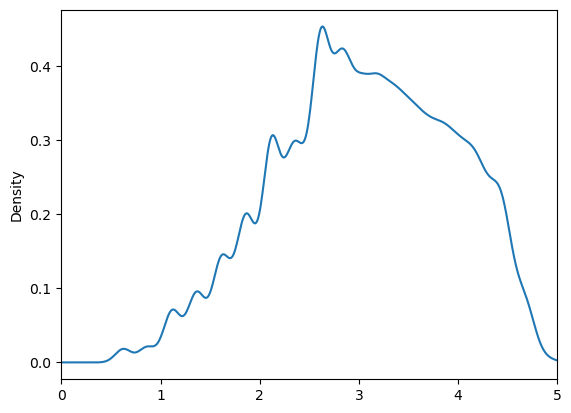

In [22]:
df_b_c['business_success'].plot.density(xlim=(0, 5))